<h2><span style="color:green;">scikit-learn</span></h2>

scikit-learn is an advanced machine-learning package. We will explore classification, cross validation and grid search.

## Classification

In this section, we will use an SVM on the [MNIST digits dataset](http://yann.lecun.com/exdb/mnist/) to train a classifier to predict the labels of the last sample. 

All the sample datasets in scikit-learn can be found in the `datasets` module. Let us inspect the digits dataset first.

In [1]:
from sklearn import datasets
digits = datasets.load_digits()
print('Data')
print(digits.data)

print('Target')
print(digits.target)

Data
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
Target
[0 1 2 ..., 8 9 8]


In scikit-learn, the feature vector is always in the form of (n_samples, n_features). It is already conveniently reshaped for us. However, if we would like to use the original images, we can always reshape it like this

In [2]:
data = digits.images.reshape((digits.images.shape[0], -1))

and then we can take a look at the reshaped data (compared to scikit-learn)

In [3]:
print('scikit-learn: n_samples = %d, n_features = %d' % (digits.data.shape[0], digits.data.shape[1]))
print('myfeatures: n_samples = %d, n_features = %d' % (data.shape[0], data.shape[1]))

scikit-learn: n_samples = 1797, n_features = 64
myfeatures: n_samples = 1797, n_features = 64


The main object in scikit-learn is an `estimator`. An `estimator` implements three important methods: `fit`, `transform` and `predict`. The `fit` method is used to estimate the parameters of a model. The `transform` method transforms the data. This is often used for feature extraction or feature selection. The `predict` method predicts the labels.

First, let us instantiate an estimator object. We will use a Support Vector Machine (SVM) with Radial Basis Function (RBF) kernel.

In [4]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

Next, we can train the SVM using all but the last sample.

In [5]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

And then we can ask our SVM classifier to predict the label of the last sample

predicted label = 8


(-0.5, 7.5, 7.5, -0.5)

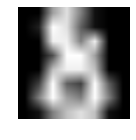

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

label = clf.predict(digits.data[-1, None])
print('predicted label = %d' % label)

plt.figure(figsize = (2,2))
plt.imshow(digits.images[-1], cmap=plt.cm.gray)
plt.axis('off')

Because most scikit-learn objects follow a similar API, it is very easy to try other classifiers by simply changing `clf = svm.SVC(gamma=0.001, C=100.)` to any other classifier.

** Q1 ** _Can you use_ [Linear Discriminant Analysis](http://scikit-learn.org/stable/modules/lda_qda.html#lda-qda) _instead of SVC for the prediction?_

In [7]:
# your code here

## Cross Validation

To avoid dataset biases, we must train and test on different subsets of the data to check model performance.

First, let us instantiate an iterator for cross validation. scikit-learn provides a bunch of iterators for cross validation: `KFold`, `StratifiedKFold`, `LeaveOneOut` etc.  Here is a [complete list](http://scikit-learn.org/stable/modules/cross_validation.html).

In [8]:
from sklearn.model_selection import ShuffleSplit
# ShuffleSplit?
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

Next, we can either iterate over the splits using a simple for loop

In [9]:
for ii, (train, test) in enumerate(cv.split(digits.data)):

    clf.fit(digits.data[train], digits.target[train])
    pred_labels = clf.predict(digits.data[test])
    score = clf.score(digits.data[test], digits.target[test])
    
    print('Fold %d, accuracy =  %0.2f' % (ii + 1, score))

Fold 1, accuracy =  0.99
Fold 2, accuracy =  0.99
Fold 3, accuracy =  0.99
Fold 4, accuracy =  0.99
Fold 5, accuracy =  0.98


We can do all this in one line using the `cross_val_score` method

In [10]:
from sklearn.model_selection import cross_val_score
# cross_val_score?
cross_val_score(clf, X=digits.data, y=digits.target, cv=cv)

array([ 0.98888889,  0.99166667,  0.98888889,  0.99444444,  0.98333333])